# Direct Regression Scatter Plots

The CO$_{2}$ flux decomposition has problems for the CalCS in particular. The first-order approximation is pretty off of the direct regression of F onto the NPGO. Perhaps it isn't the approximation itself, but rather the fact that the relationship between anomalous CO$_{2}$ flux and the NPGO is non-linear. Here I'll make scatter plots to check that out

In [80]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.style.use('ocn-clim')
import esmtools as et

Load in AW CO$_{2}$ flux residuals and the NPGO.

In [ ]:
def load_timeseries(EBU, IDX):
    fpath1 = ('/glade/p/work/rbrady/EBUS_BGC_Variability/FG_CO2/' + EBU + '/filtered_output/' +
              EBU.lower() + '-FG_CO2-residuals-AW-chavez-800km.nc')
    y = xr.open_dataset(fpath1)
    y = y['FG_CO2_AW']
    if IDX == 'NPGO':
        fpath2 = ('/glade/p/work/rbrady/EBUS_BGC_Variability/NPGO/')
        x = xr.open_mfdataset(fpath2 + '*.nc', concat_dim='ensemble')
        x = x['pc']
    else:
        fpath2 = ('/glade/p/work/rbrady/cesmLE_CVDP/processed/')
        x = xr.open_dataset(fpath2 + 'cvdp_detrended_BGC.nc')
        x = x[IDX]
    return x, y

In [106]:
EBU = 'HumCS'
IDX = 'nino3'

In [107]:
x, y = load_timeseries(EBU, IDX)

Make plot!

In [108]:
x = x.isel(ensemble=slice(0,9)).stack(points=['ensemble','time'])
y = y.isel(ensemble=slice(0,9)).stack(points=['ensemble','time'])

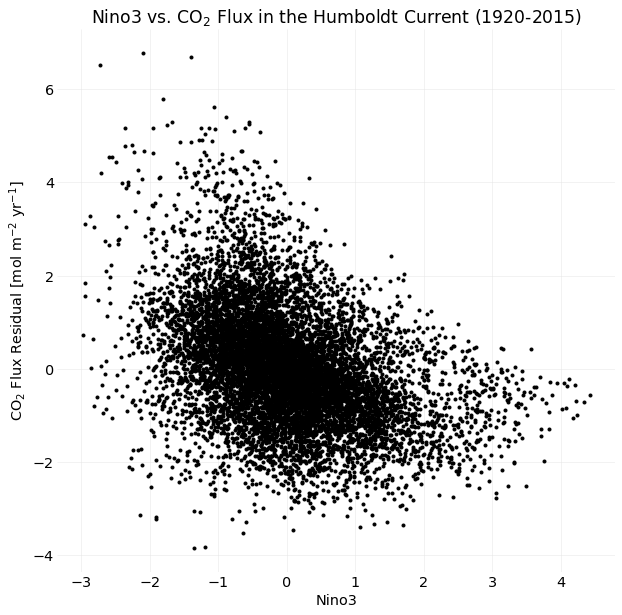

In [109]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, '.k')
ax.set_xlabel('Nino3')
ax.set_ylabel('CO$_{2}$ Flux Residual [mol m$^{-2}$ yr$^{-1}$]')
ax.set_title('Nino3 vs. CO$_{2}$ Flux in the Humboldt Current (1920-2015)')

#et.vis.savefig('Nino3_F_scatter_HumCS', extension='.eps', dpi=300)

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
for ix in range(10):
    ax.plot(x.isel(ensemble=ix), y.isel(ensemble=ix), '.')